#**Importing dependencies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score


##**Data processing**

In [ ]:
# Load the 'Student_Performance' file and display the first 5 values
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.describe() # generates descriptive statistics of the DataFrame's columns
# dataframe have not null values

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.isnull().sum() # confirm if df have null values

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
# dataframe have a column 'Extracurricular Activities' that have string values 'Yes' and 'No'
# must replace then with numerical data 1 and 0

df.replace({'Extracurricular Activities': {'Yes': 1, 'No': 0}}, inplace= True)

## correlation heatmap to see the correlation between features

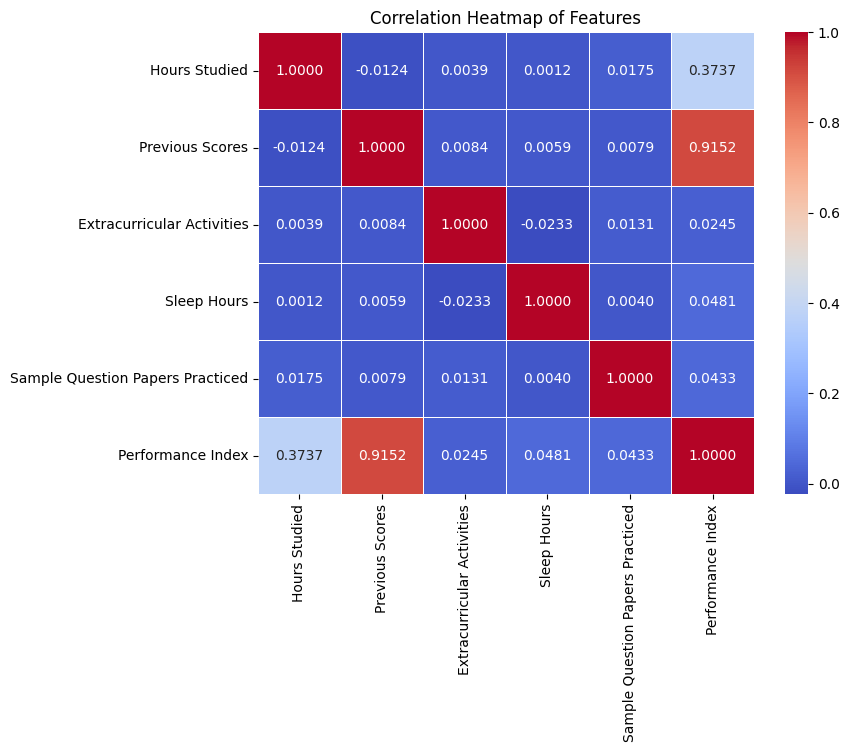

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the correlation heatmap
plt.figure(figsize=(8, 6)) # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
# Create independent variables X and target variable y
X = df.drop(columns=['Performance Index'], axis=1)
y = df['Performance Index']

## spliting the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
test_score = linear_model.score(X_test, y_test)


print(f"R-squared score on the test data: {test_score:.2f}")

# Alternatively, you can predict and then calculate R2 score manually
y_pred = linear_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

R-squared score on the test data: 0.99
0.9889832909573145
